In [1]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv')

In [3]:
#Reading the files
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Get basic statistical summary of the dataset
summary_statistics = df.describe()

missing_values, summary_statistics

(W      0
 R      0
 AB     0
 H      0
 2B     0
 3B     0
 HR     0
 BB     0
 SO     0
 SB     0
 RA     0
 ER     0
 ERA    0
 CG     0
 SHO    0
 SV     0
 E      0
 dtype: int64,
                 W           R           AB            H          2B  \
 count   30.000000   30.000000    30.000000    30.000000   30.000000   
 mean    80.966667  688.233333  5516.266667  1403.533333  274.733333   
 std     10.453455   58.761754    70.467372    57.140923   18.095405   
 min     63.000000  573.000000  5385.000000  1324.000000  236.000000   
 25%     74.000000  651.250000  5464.000000  1363.000000  262.250000   
 50%     81.000000  689.000000  5510.000000  1382.500000  275.500000   
 75%     87.750000  718.250000  5570.000000  1451.500000  288.750000   
 max    100.000000  891.000000  5649.000000  1515.000000  308.000000   
 
               3B          HR          BB          SO          SB          RA  \
 count  30.000000   30.000000   30.000000    30.00000   30.000000   30.000000   
 me

As there are no missing values, hence there is no need of data imputation

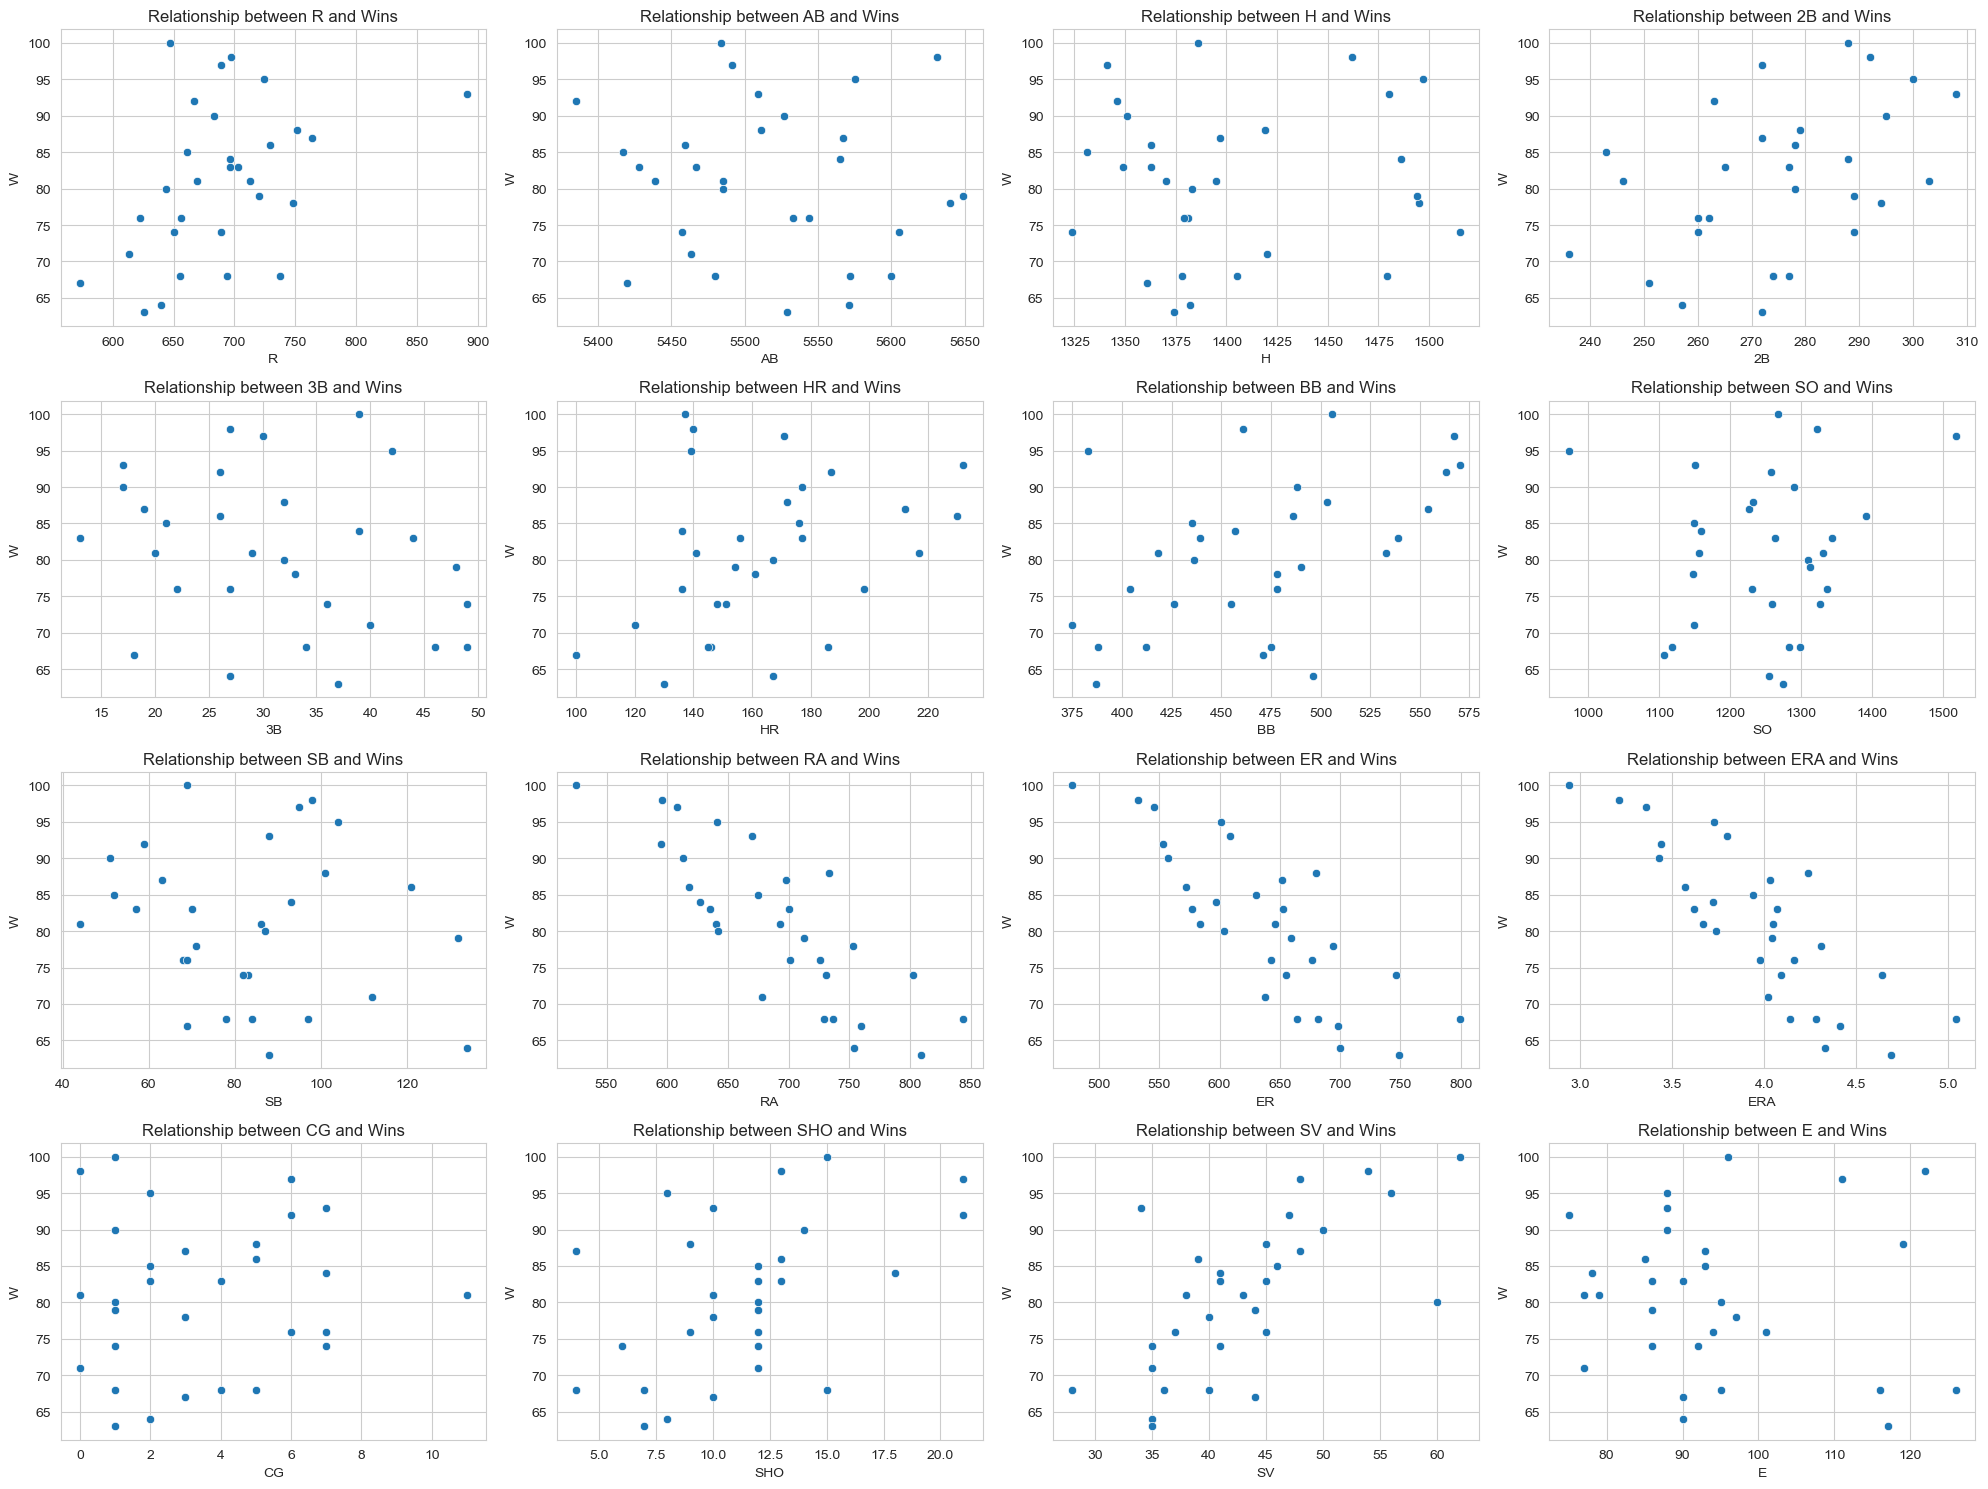

In [5]:
#Setting the aesthetics for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(20, 15))

#Number of rows and columns for the subplots
n_rows = 4
n_cols = 4

#List of features to visualize
features = df.columns[1:]

#Iterate through the features and create subplots
for index, feature in enumerate(features, 1):
    plt.subplot(n_rows, n_cols, index)
    sns.scatterplot(x=feature, y='W', data=df)
    plt.title(f'Relationship between {feature} and Wins')

plt.tight_layout()
plt.show()

As per the above scatter plots:
There is positive correlation between R(Runs), SV(Saves), BB(Base on Balls) with no. of Wins(W).
There is negative correlation between RA(Runs Allowed), ER(Earned Runs), ERA(Earned Run Average) with no. of Wins(W).
& There is no clear correlation between SO(Strikeouts), E(Errors), AB(At Bat), H(Hits), 2B(Doubles), 3B(Triples), HR(Home Runs) with no. of Wins(W).

In [6]:
from sklearn.model_selection import train_test_split

#Split the dataset into features and target variable
X = df.drop('W', axis=1)
y = df['W']

#Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((24, 16), (6, 16))

In [7]:
#Calling the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Predict the number of wins on the testing data
y_pred = lr_model.predict(X_test)

#Calculate the Mean Squared Error and R-squared value for the model on the testing data
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(27.94303250666748, 0.78764003161494)

In [ ]:
As the value of r2 is near to 1, hence it can be said that the model is working well

In [8]:
#Test win predictions
y_pred

array([ 82.87055379, 101.01861025,  69.42504558,  93.71375515,
        91.5547615 ,  79.20277886])

y_pred

In [10]:
#Function to get user input for each feature and predict the number of wins
def predict_wins(model):
    input_data = {}
    
    #List of features
    features = ['R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']
    
    #Prompting user for input for each feature
    for feature in features:
        try:
            value = float(input(f"Enter value for {feature}: "))
            input_data[feature] = value
        except ValueError:
            print(f"Invalid input for {feature}. Please enter a numeric value.")
            return None
    
    input_df = pd.DataFrame([input_data])
    
    #Predict wins using the model
    predicted_wins = model.predict(input_df)[0]
    
    return predicted_wins

# Getting user input and predict wins
predicted_wins = predict_wins(lr_model)
predicted_wins
#	724	5575	1497	300	42	139	383	973	104	641	601	3.73	2	8	56	88

Enter value for R: 724
Enter value for AB: 5575
Enter value for H: 1497
Enter value for 2B: 300
Enter value for 3B: 42
Enter value for HR: 139
Enter value for BB: 383
Enter value for SO: 973
Enter value for SB: 104
Enter value for RA: 641
Enter value for ER: 601
Enter value for ERA: 3.73
Enter value for CG: 2
Enter value for SHO: 8
Enter value for SV: 56
Enter value for E: 88


96.31913948773956

For the above prediction, values from the 1st row of original, dataset has been given as the input. So after execution, the result shows 96.2 as the output, i.e., No. of wins(W) which is almost equal to 95(given value). Hence, the model is performing well with a very slight which is obvious as the model has very few rows to get trained.